**Тема**: Прогнозирование конечных свойств новых материалов
(композиционных материалов).

Описание:
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними.
Композиты обладают теми свойствами, которые не наблюдаются у
компонентов по отдельности. При этом композиты являются монолитным
материалом, т. е. компоненты материала неотделимы друг от друга без
разрушения конструкции в целом. Яркий пример композита - железобетон.
Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная
арматура внутри бетона компенсирует его неспособность сопротивляться
сжатию, формируя тем самым новые, уникальные свойства. Современные
композиты изготавливаются из других материалов: полимеры, керамика,
стеклянные и углеродные волокна, но данный принцип сохраняется. У такого
подхода есть и недостаток: даже если мы знаем характеристики исходных
компонентов, определить характеристики композита, состоящего из этих
компонентов, достаточно проблематично. Для решения этой проблемы есть
два пути: физические испытания образцов материалов, или прогнозирование
характеристик. Суть прогнозирования заключается в симуляции
представительного элемента объема композита, на основе данных о
характеристиках входящих компонентов (связующего и армирующего
компонента).


На входе имеются данные о начальных свойствах компонентов
композиционных материалов (количество связующего, наполнителя,
температурный режим отверждения и т.д.). На выходе необходимо
спрогнозировать ряд конечных свойств получаемых композиционных
материалов.


**Актуальность:** Созданные прогнозные модели помогут сократить
количество проводимых испытаний, а также пополнить базу данных
материалов возможными новыми характеристиками материалов, и
цифровыми двойниками новых композитов.
Датасет со свойствами композитов. Объединение делать по индексу
тип объединения INNER
https://drive.google.com/file/d/1B1s5gBlvgU81H9GGolLQVw_SOi-vyNf2/view?usp=sharing


**Требуется:**
1. Изучить теоретические основы и методы решения поставленной задачи.
2. Провести разведочный анализ предложенных данных. Необходимо
нарисовать гистограммы распределения каждой из переменной, диаграммы
ящика с усами, попарные графики рассеяния точек. Необходимо также для
каждой колонке получить среднее, медианное значение, провести анализ и
исключение выбросов, проверить наличие пропусков.
3. Провести предобработку данных (удаление шумов, нормализация и
т.д.).
4. Обучить нескольких моделей для прогноза модуля упругости при
растяжении и прочности при растяжении. При построении модели
необходимо 30% данных оставить на тестирование модели, на остальных
происходит обучение моделей. При построении моделей провести поиск
гиперпараметров модели с помощью поиска по сетке с перекрестной
проверкой, количество блоков равно 10.
5. Написать нейронную сеть, которая будет рекомендовать
соотношение матрица-наполнитель.
6. Разработать приложение с графическим интерфейсом или
интерфейсом командной строки, которое будет выдавать прогноз,
полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
7. Оценить точность модели на тренировочном и тестовом датасете.
8. Создать репозиторий в GitHub / GitLab и разместить там код
исследования. Оформить файл README.

**Анализ данных**

Провести разведочный анализ предложенных данных.  

* необходимо нарисовать гистограммы распределения каждой из переменной;
* диаграммы ящика с усами, попарные графики рассеяния точек;
* необходимо также для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов, проверить наличие пропусков.

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df_bp = pd.read_excel('/content/X_bp.xlsx', index_col=0)
df_nup = pd.read_excel('/content/X_nup.xlsx', index_col=0)
df = df_bp.join(df_nup, how='inner') # Объединяем два датасета
df = df.rename({'модуль упругости, ГПа': 'Модуль упругости, ГПа'}, axis='columns')
df.index = df.index.astype(int)
df.to_excel('dataset.xlsx')

**Описательная статистика**

В первую очередь проведем начальное исследование данных

В исходных данных нет пропущеных значений

In [218]:
df.isna().sum() # Проверяем пропуски

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Среднее, медианное значение, квантили

In [219]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
Модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Параметр "Угол нашивки, град" принимает всего два значения

In [81]:
df['Угол нашивки, град'].unique() # Всего два значения для 'Угол нашивки, град' - 0 и 90 градусов

array([ 0., 90.])

Рассмотрим распределения переменных

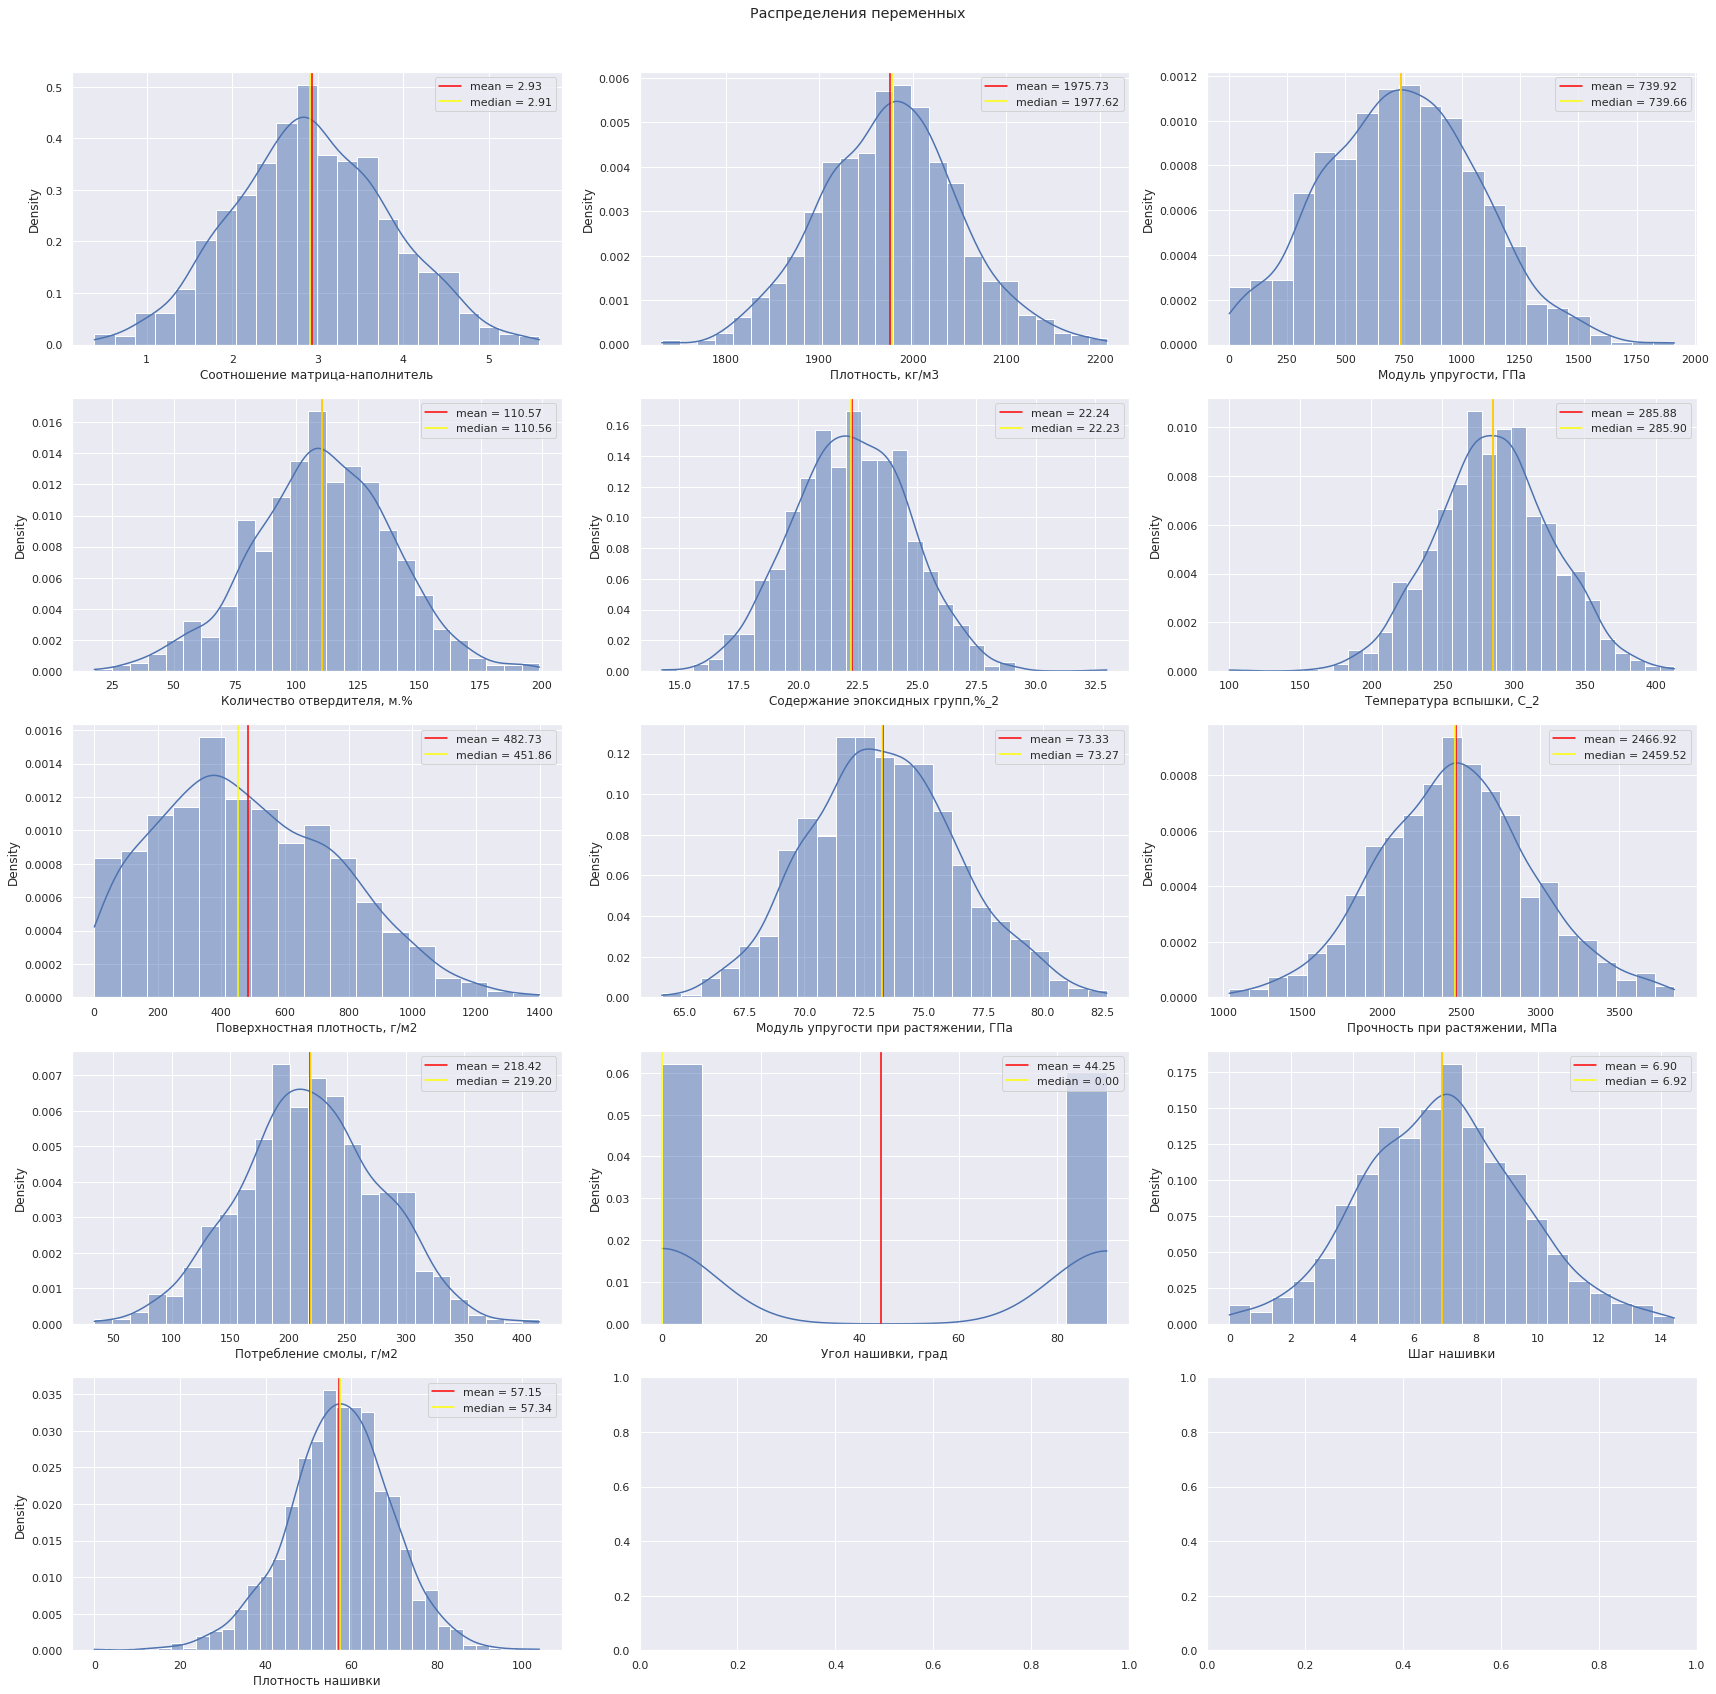

In [220]:
sns.set(rc={'figure.figsize':(24,24)})
fig, axes = plt.subplots(ncols=3, nrows=5)

for col_name, ax in zip(df.columns, axes.flat):
    sns.histplot(df[col_name], ax=ax, kde=True, stat="density") # Функция плотности
    mean = df[col_name].mean() # Среднее
    median = df[col_name].median() # Медиана
    ax.axvline(x=mean, color='red', label=f'mean = {mean:.2f}') 
    ax.axvline(x=median, color='yellow', label=f'median = {median:.2f}') 
    ax.legend()


fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

Распределения переменных, соответствующие двум вариантам параметра "Угол нашивки, град"

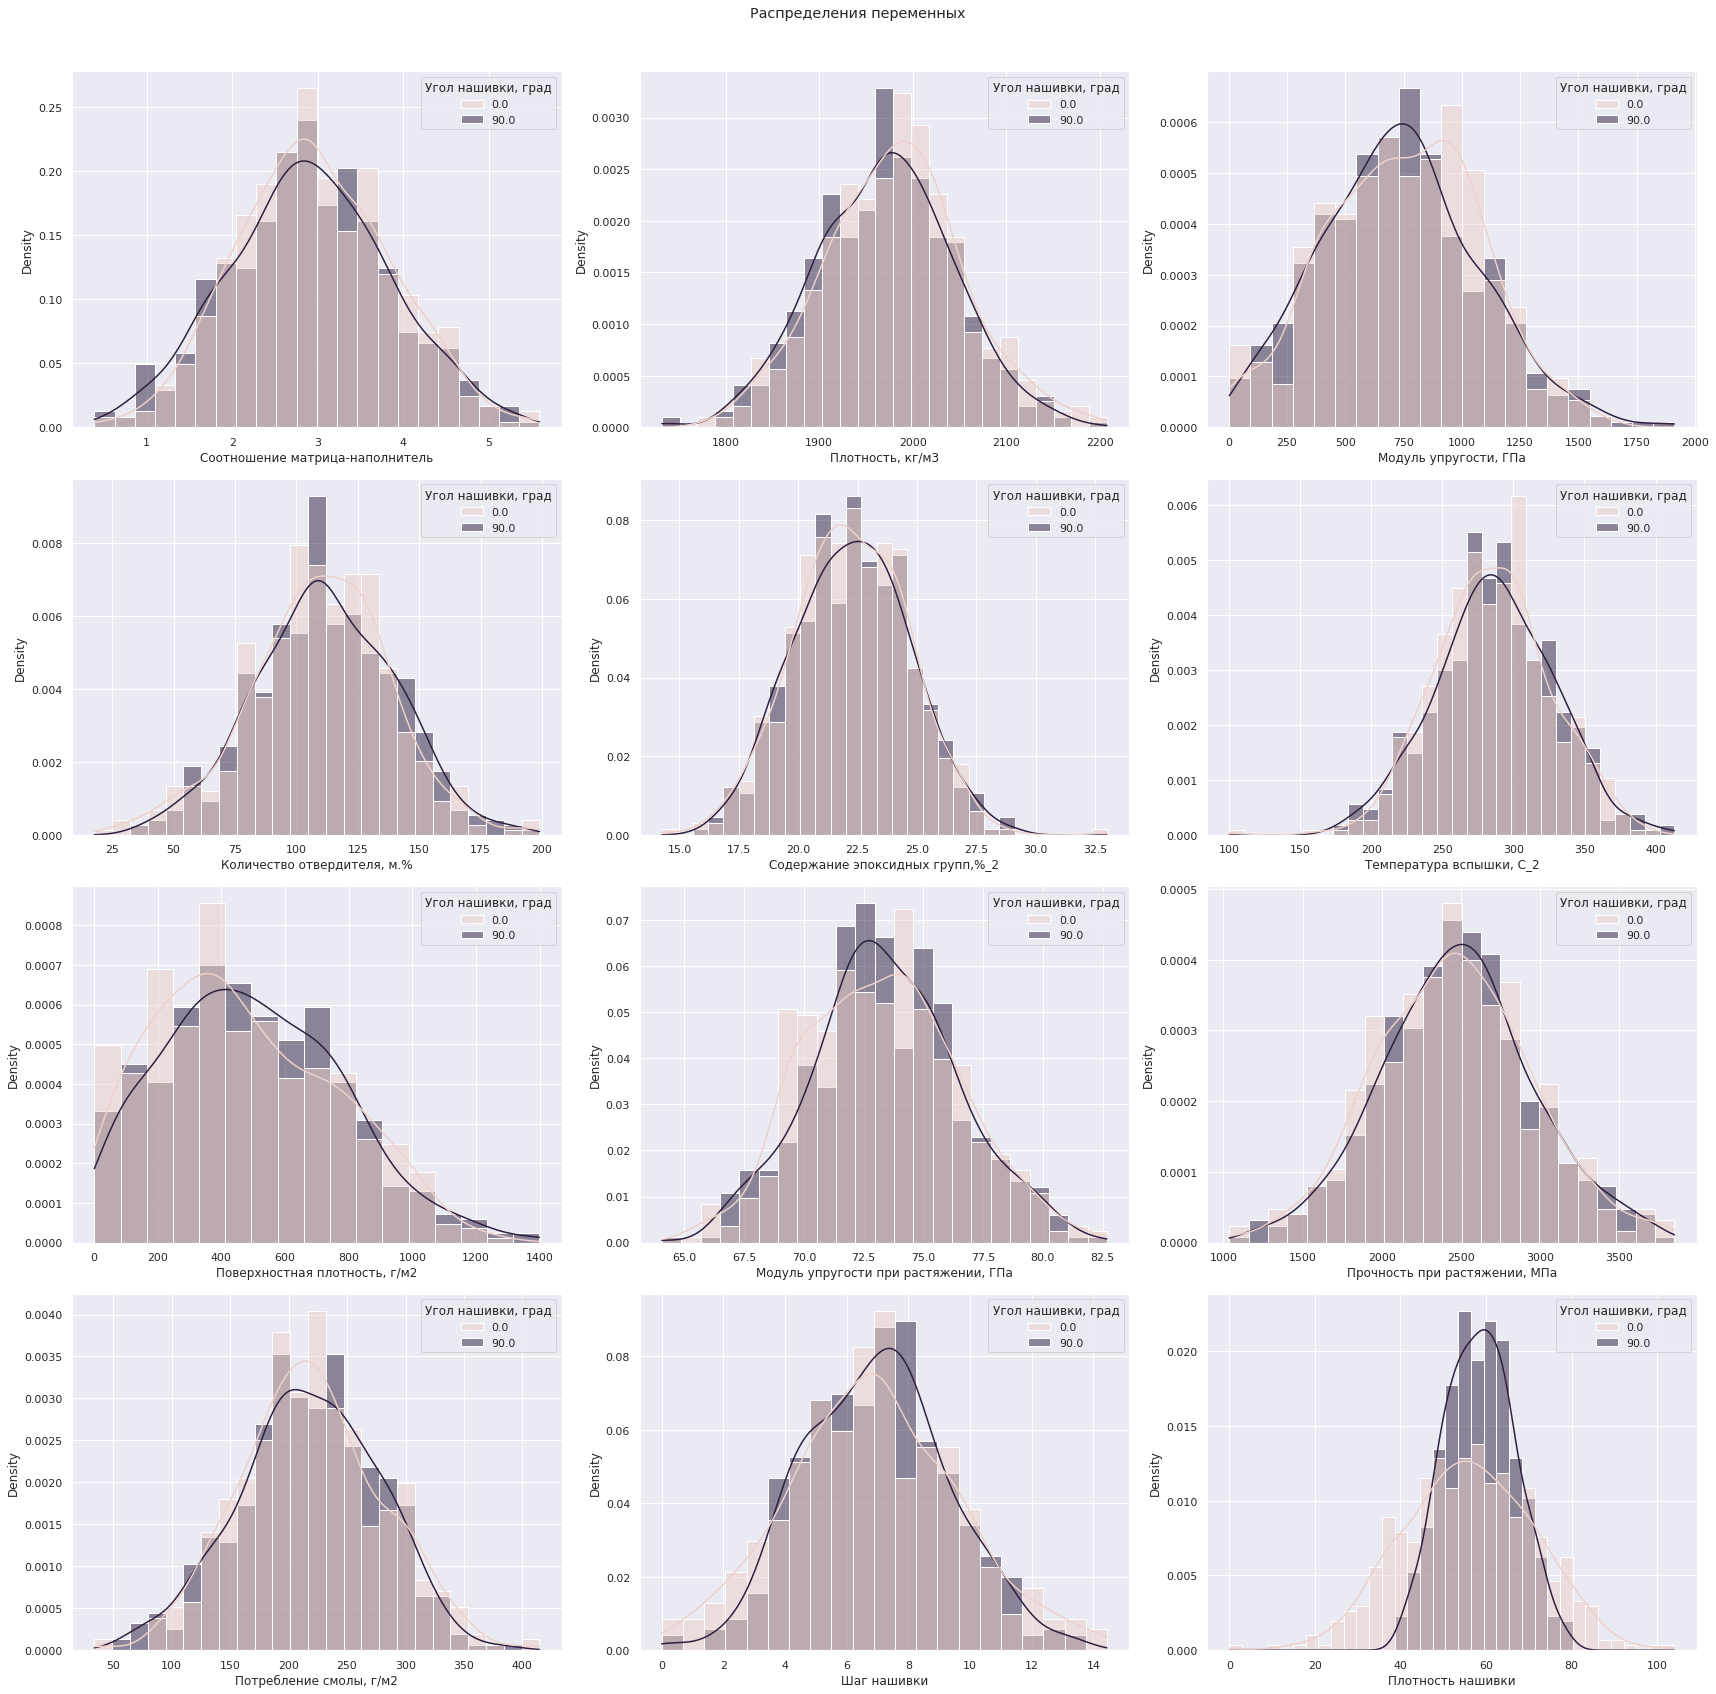

In [313]:
sns.set(rc={'figure.figsize':(24,24)})
fig, axes = plt.subplots(ncols=3, nrows=4)
col_names = list(df.columns)
col_names.remove('Угол нашивки, град')
for col_name, ax in zip(col_names, axes.flat):
    sns.histplot(df, x=col_name, hue='Угол нашивки, град', legend=True, ax=ax, kde=True, stat="density") # Функция плотности 
 

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

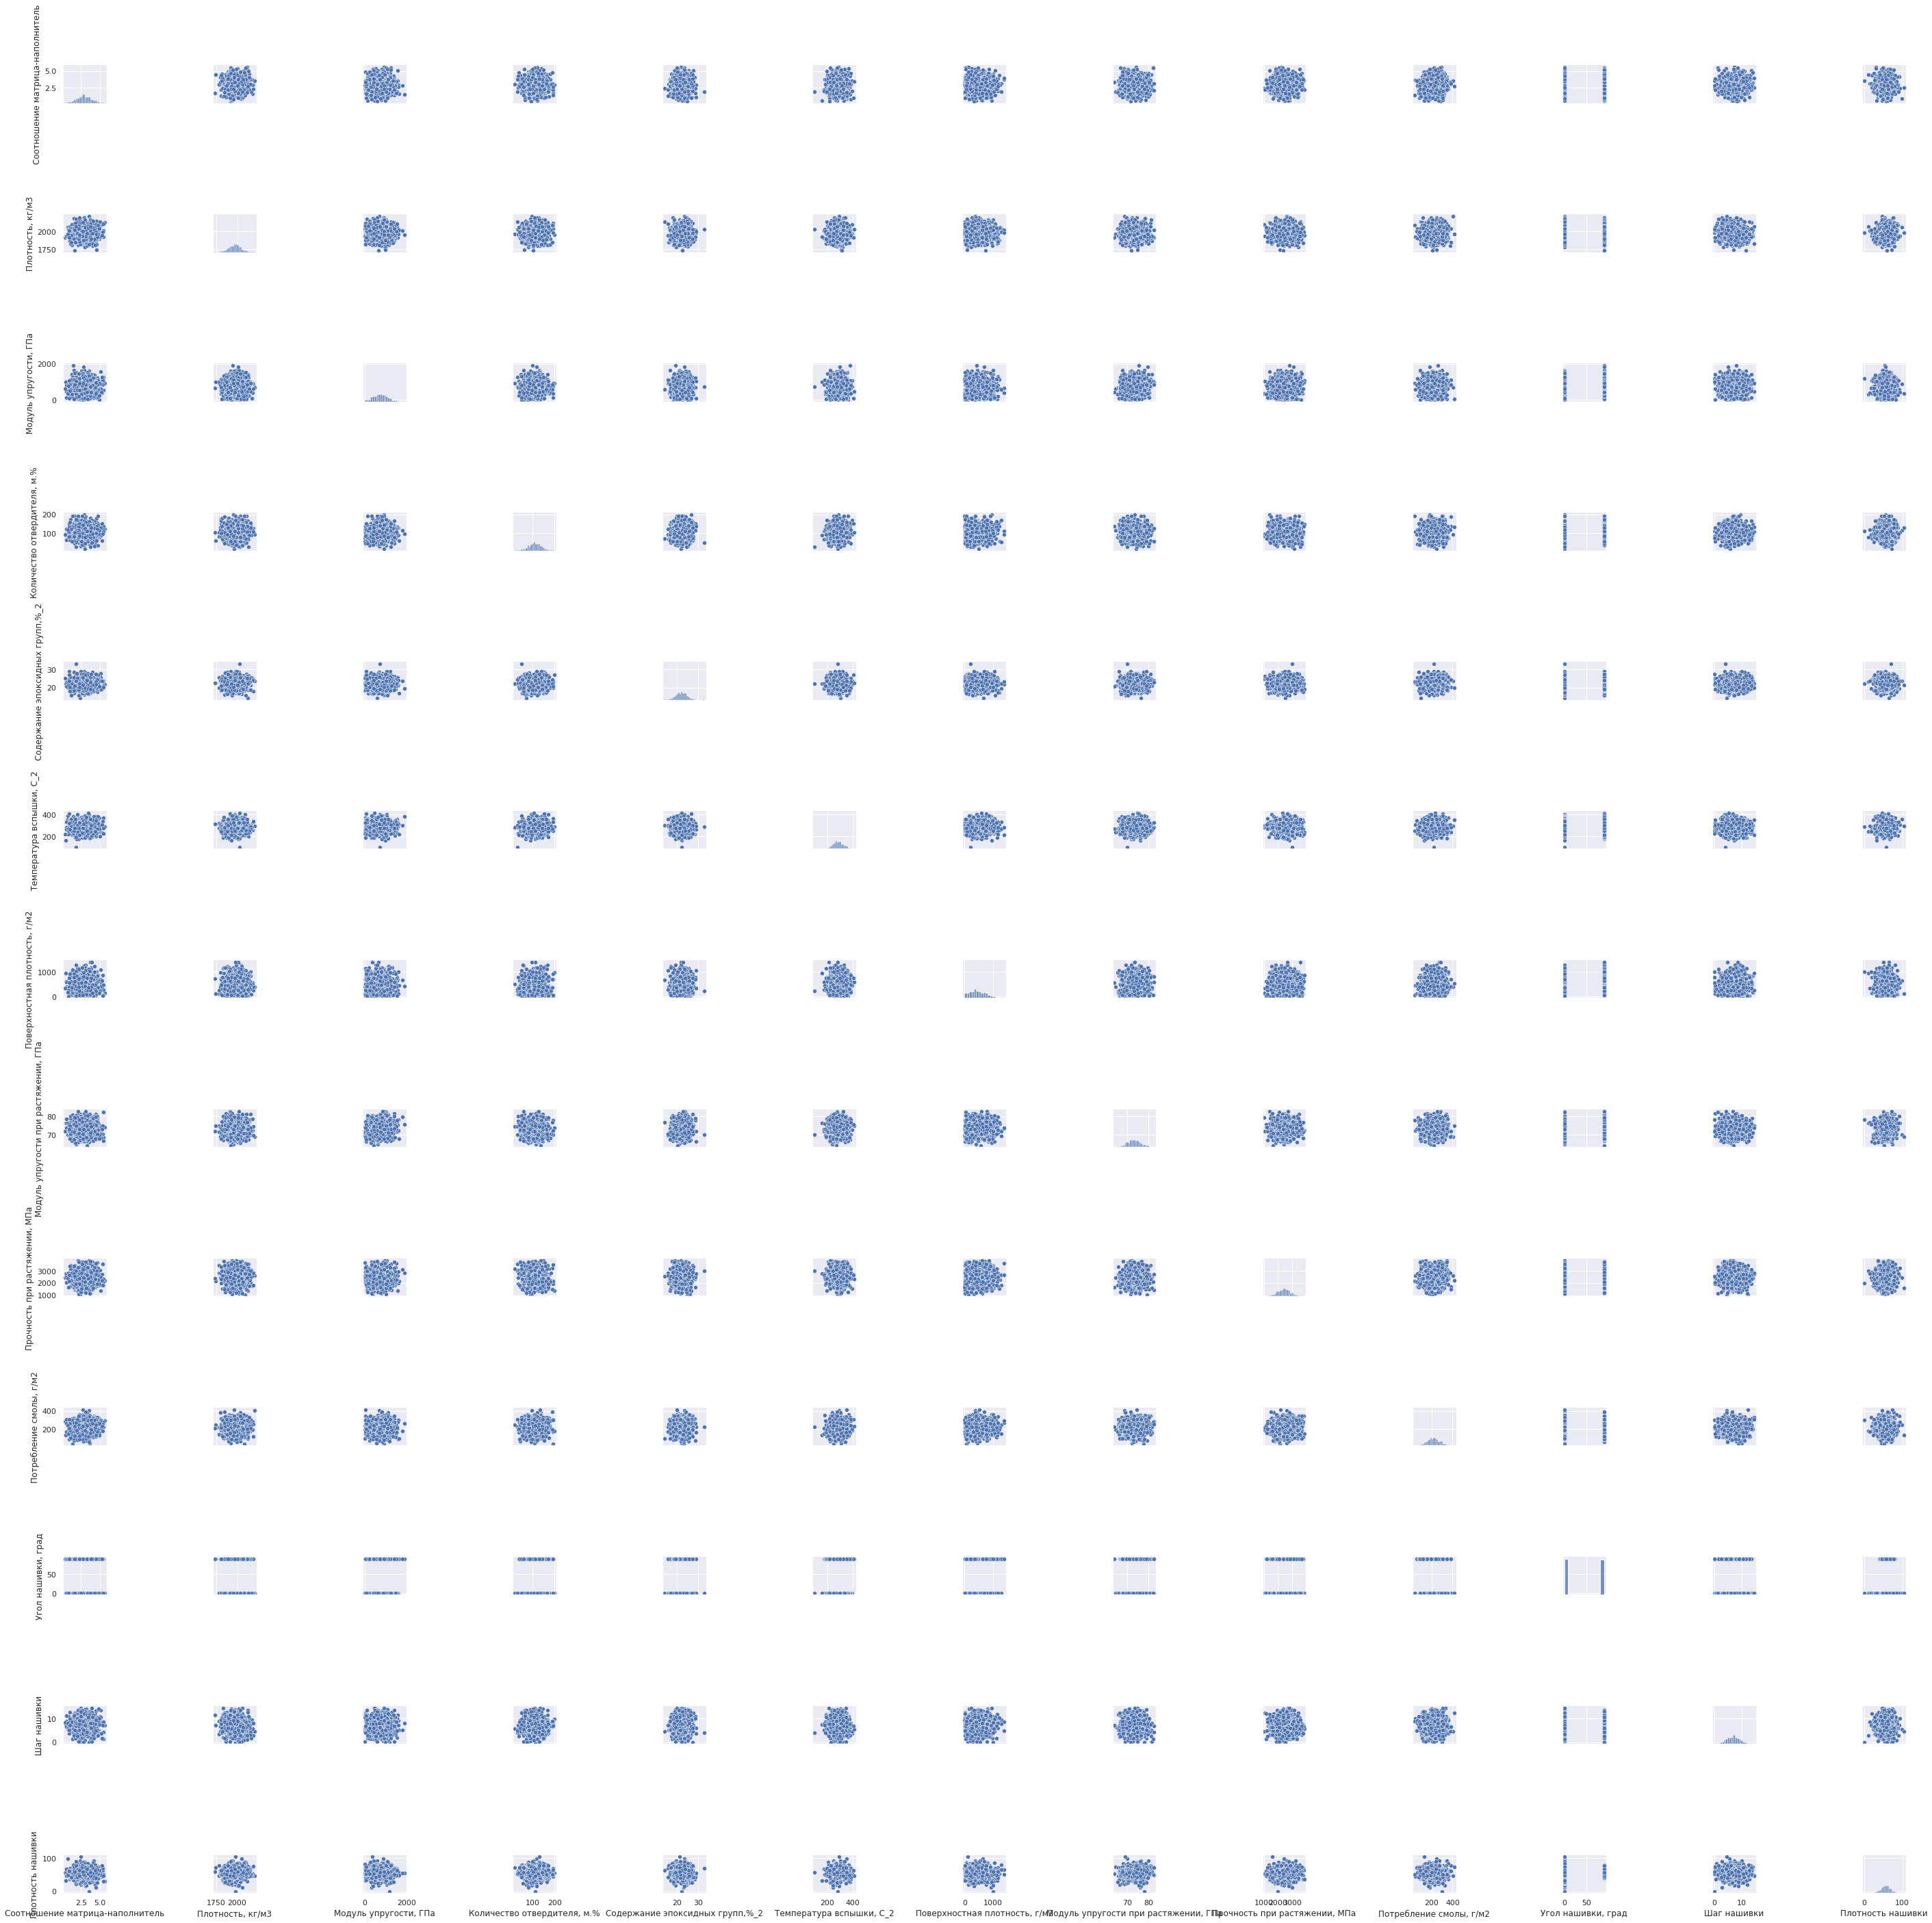

In [223]:
sns.pairplot(df, height=3)
plt.tight_layout()

Text(0.5, 0.98, 'Диаграммы рассеяния')

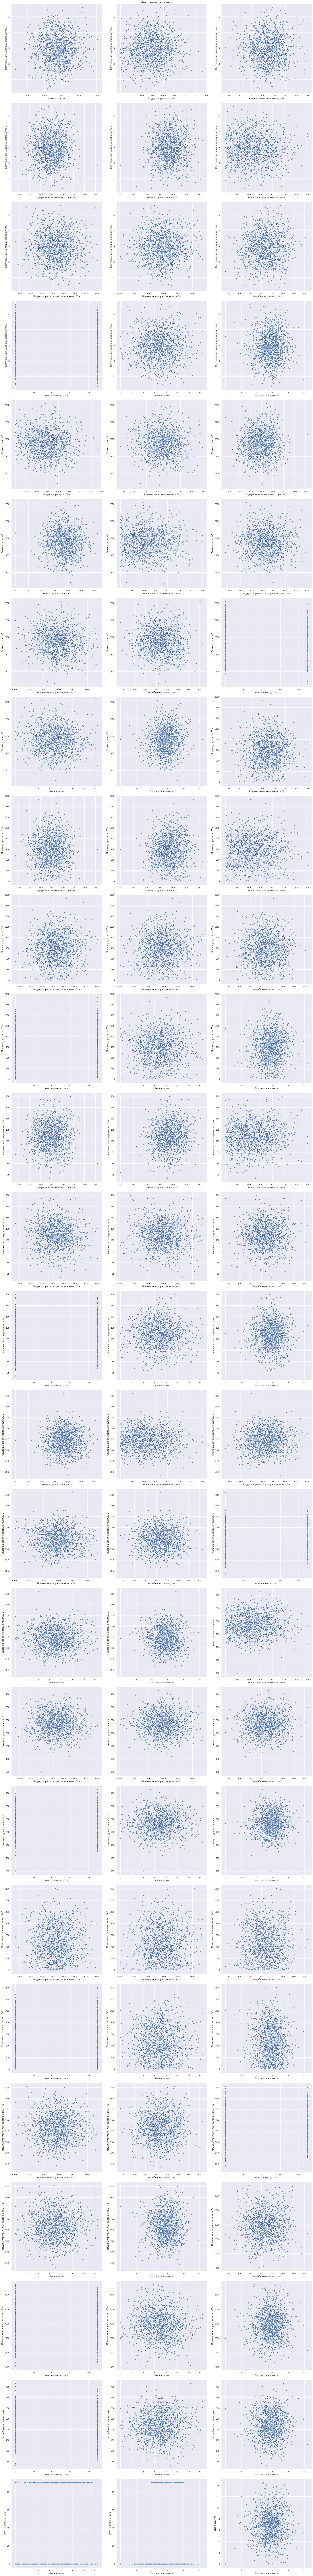

In [316]:
from itertools import combinations

sns.set(rc={'figure.figsize':(24,200)})
fig, axes = plt.subplots(ncols=3, nrows=26)

for pair_cols, ax in zip(combinations(df.columns, 2), axes.flat):
    sns.scatterplot(x=pair_cols[1], y=pair_cols[0], data=df, ax=ax)
    ax.set_xlabel(pair_cols[1])
    ax.set_ylabel(pair_cols[0])
  
fig.tight_layout(rect=[0, 0, 1, 0.98])
fig.suptitle("Диаграммы рассеяния")


**Корреляция между данными**

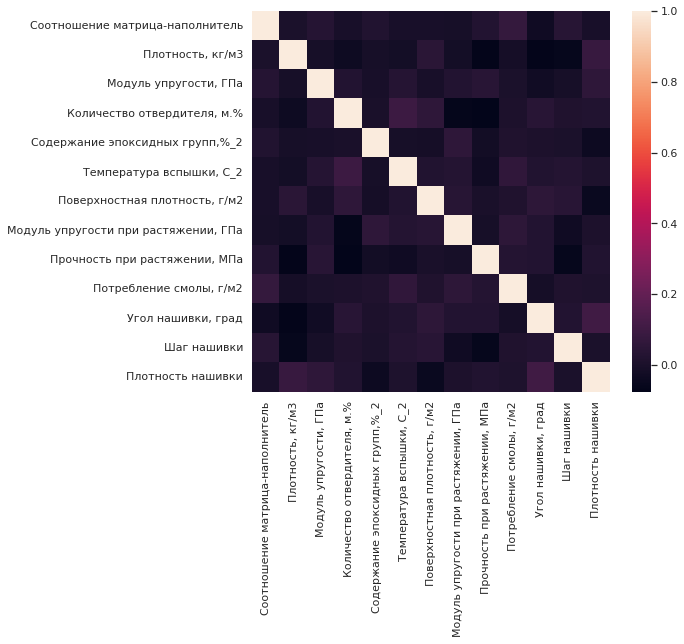

In [362]:
sns.heatmap(df.corr())

Данные очень слабо коррелируют между собой

Для анализа и поиска выбросов построим BoxPlot для каждого параметра

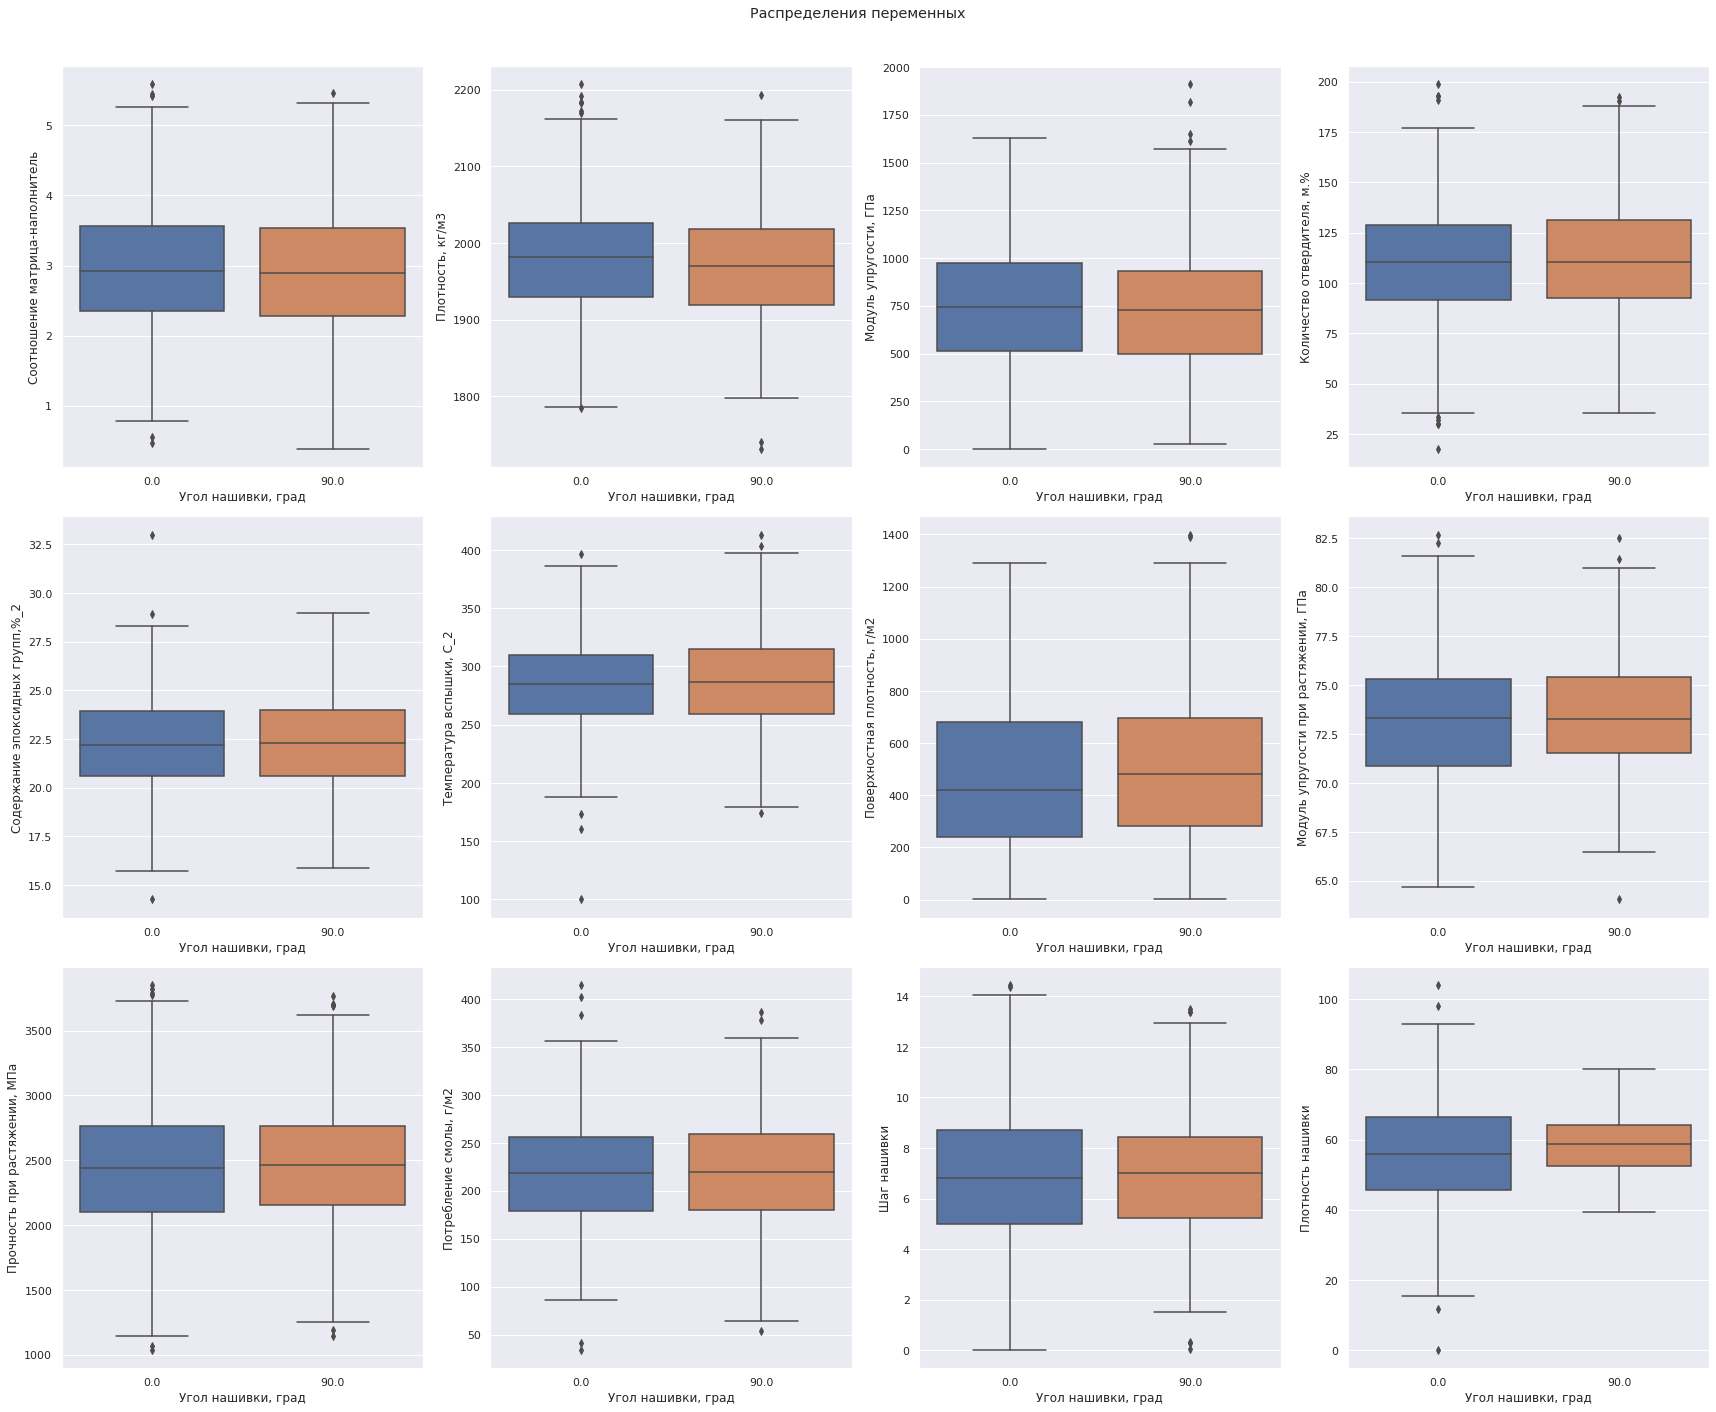

In [315]:
sns.set(rc={'figure.figsize':(24,20)})
fig, axes = plt.subplots(ncols=4, nrows=3)
col_names = list(df.columns)
col_names.remove('Угол нашивки, град')
for col_name, ax in zip(col_names, axes.flat):
    sns.boxplot(x = df['Угол нашивки, град'], y=df[col_name], ax=ax)

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

Удалим выбросы с помощью межквартального расстояния

In [3]:
df_clean = df.copy()
for col_name in df.columns:
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  filter = (df_clean[col_name] >= Q1 - 1.5 * IQR) & (df_clean[col_name] <= Q3 + 1.5 *IQR)
  df_clean = df_clean.loc[filter] 

In [224]:
print("Кол-во аномальных записей: {:.2f}%".format((100 *  (df.shape[0] - df_clean.shape[0]) / df.shape[0])))

Кол-во аномальных записей: 8.50%


Результат удаления аномальных записей

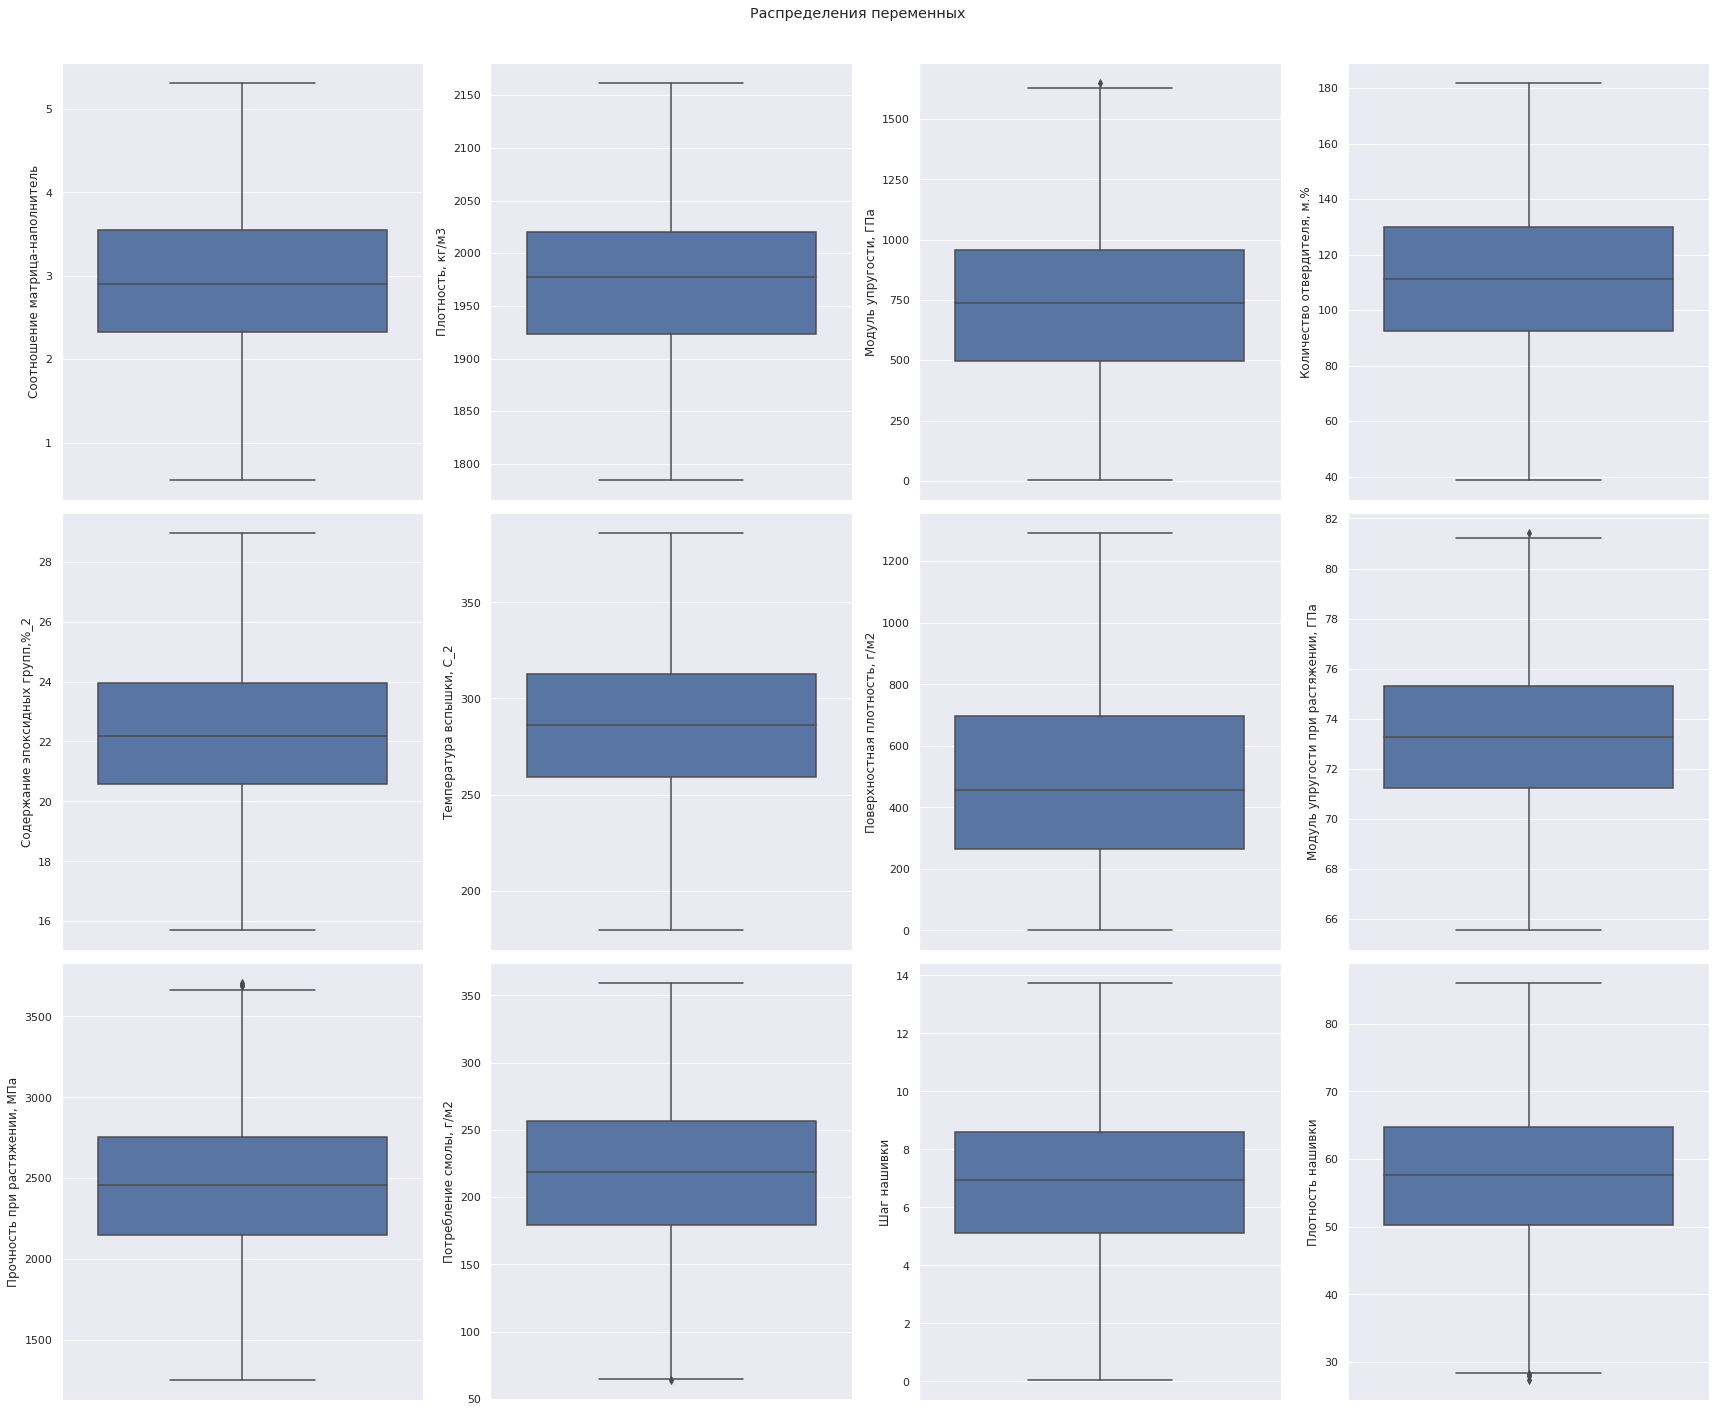

In [225]:
sns.set(rc={'figure.figsize':(24,20)})
fig, axes = plt.subplots(ncols=4, nrows=3)

col_names = list(df.columns)
col_names.remove('Угол нашивки, град')

for col_name, ax in zip(col_names, axes.flat):
    sns.boxplot(y=df_clean[col_name], ax=ax)

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

<H2>Задание 1:

Необходимо обучить нескольких моделей для прогноза параметров:

*   Модуль упругости при растяжении, ГПа
*   Прочность при растяжении, МПа

При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей проводим поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10

In [213]:
df_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                 0.0          4.0               60.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0  
5                    220.0                 0.0          5.0               60.0  
6                    220.0                 0.0          5.0               70.0

В первую очередь решим задачу для определения **модуля упругости при растяжении (ГПа)**

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

target_name = 'Модуль упругости при растяжении, ГПа'

y = df_clean[target_name]

# Убираем предсказываемые параметры
X = df_clean.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=False) 


x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X) # Нормализация данных

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

In [230]:
from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

Функция для подбора параметров модели и анализа результатов

In [232]:
def build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test):

  gsc = GridSearchCV(regressor, parameters, cv=10)
  gsc.fit(X_train,y_train.ravel())
  print("Best Hyperparameters:\n{}".format(gsc.best_params_))
  best_model = gsc.best_estimator_

  y_train_pred = best_model.predict(X_train)
  train_r2_score = best_model.score(X_train, y_train)
  # print("[Train] R-squared:{:.3f}".format(train_r2_score))
  train_mse = mean_squared_error(y_train, y_train_pred)
  # print("[Train] MSE: %.2f" % train_mse)
  train_mae = mean_absolute_error(y_train, y_train_pred)
  # print("[Train] MAE: %.2f" % train_mae)
  train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
  # print("[Train] MAPE: %.2f" % train_mape)

  y_test_pred = best_model.predict(X_test)
  test_r2_score = best_model.score(X_test,y_test)
  # print("[Test] R-squared:{:.3f}".format(test_r2_score))
  test_mse = mean_squared_error(y_test, y_test_pred)
  # print("[Test] MSE: %.2f" % test_mse)
  test_mae = mean_absolute_error(y_test, y_test_pred)
  # print("[Test] MAE: %.2f" % test_mae)
  test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
  # print("[Test] MAPE: %.2f" % test_mape)

  stat_results = pd.DataFrame({'Name':[str(regressor)[:-2], str(regressor)[:-2]], 
                               'Stage':['Train', 'Test'],
                               'R^2': [train_r2_score,test_r2_score],
                               'MSE': [train_mse,test_mse],
                               'MAE': [train_mae,test_mae],
                               'MAPE': [train_mape,test_mape]})

  fig, axes = plt.subplots(ncols=1, nrows=2)

  sns.set(rc={'figure.figsize':(28,6)})
  
  axes[0].plot(list(range(y_train.shape[0])), y_train, label='Original')
  axes[0].plot(y_train_pred, label='Predict')
  axes[0].legend()
  axes[0].set_title('Train Predictions')
  axes[1].plot(list(range(y_test.shape[0])), y_test, label='Original')
  axes[1].plot(y_test_pred, label='Predict')
  axes[1].legend()
  axes[1].set_title('Test Predictions')


  fig.suptitle(str(regressor)[:-2])
  plt.show()
  return stat_results, best_model

**Рассмотрим различные регрессионные модели:**

*  *GradientBoostingRegressor*
*  *RandomForestRegressor*
* *KNeighborsRegressor*

Линейные модели, такие как *LinearRegression*, *Lasso*, *Ridge* не показали достаточных результатов, так как в данных не наблюдается линейной зависимости

В качестве базовой модели будем использовать **DummyRegressor**

Best Hyperparameters:
{}


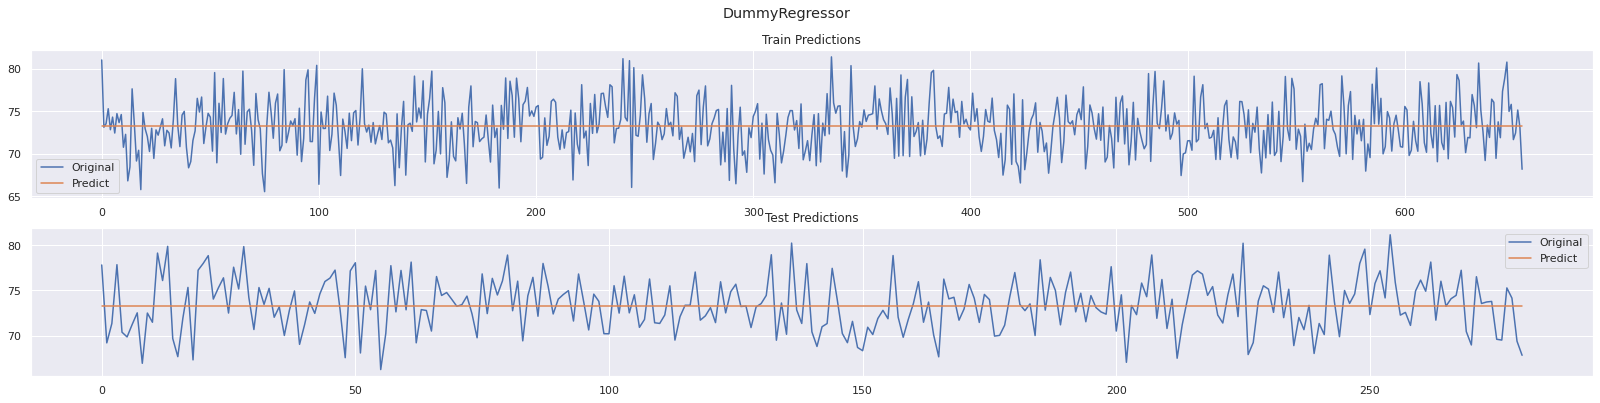

             Name  Stage      R^2       MSE       MAE      MAPE
0  DummyRegressor  Train  0.00000  9.415500  2.469857  0.033766
1  DummyRegressor   Test -0.00593  8.765902  2.398634  0.032616


In [237]:
regressor = DummyRegressor()
parameters = { }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = pd.DataFrame(columns=['Name', 'Stage', 'R^2', 'MSE','MAE', 'MAPE'])
all_stats = all_stats.append(stats, ignore_index=True)

**RandomForestRegressor** - случайный лес, метод, в котором обучается несколько независимых деревьев решений, а их результат работы усредняется. Данный метод работает лучше, чем одно дерево, особенно если данные содержат большое кол-во параметров. В целом, деревья решения способны находить нелинейные зависимости в данных.




Best Hyperparameters:
{'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}


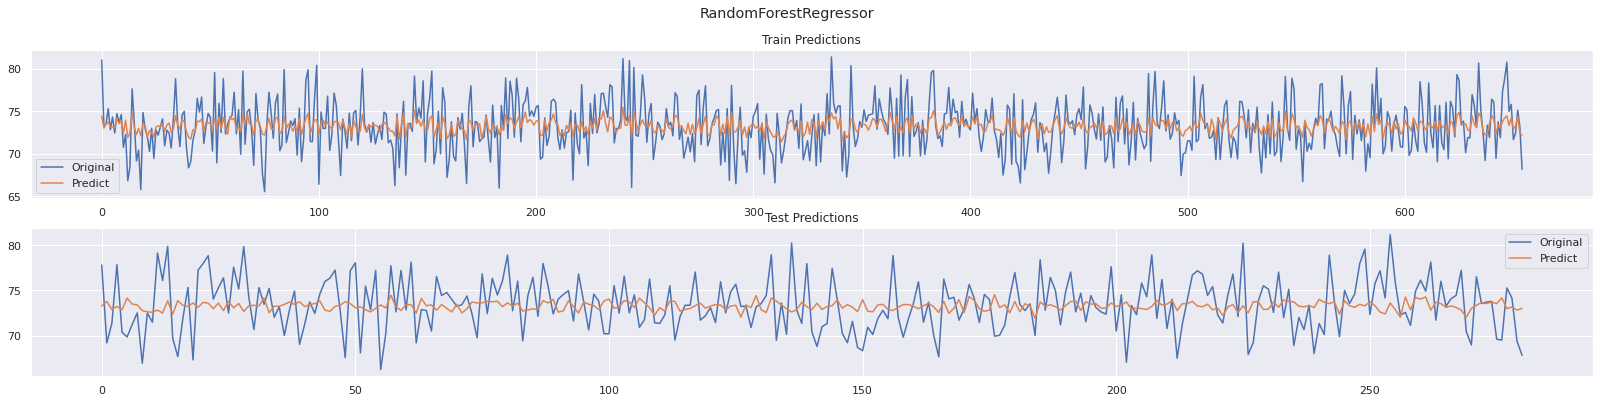

                    Name  Stage       R^2       MSE       MAE      MAPE
0  RandomForestRegressor  Train  0.349268  6.126967  1.962504  0.026843
1  RandomForestRegressor   Test -0.021166  8.898672  2.417373  0.032893


In [238]:
regressor = RandomForestRegressor()
parameters = { 
            "n_estimators"        : [10,50,100], # Число деревьев
            "max_features"        : ["sqrt", "log2"], # Кол-во параметров для расщепления
            "min_samples_split"   : [8,16], # Минимальное число объектов, при котором выполняется расщепление
            "min_samples_leaf"    : [2,5,8], # Ограничение на число объектов в листьях
            "max_depth"           : [100]} # Максимальная глубина деревьев

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**GradientBoostingRegressor** - градиентный бустинг над деревьями решений. Данный метод, в отличие от RandomForest, работает последовательно добавляя к прошлым моделям новые так, чтобы исправлялись ошибки, допущенные предыдущими предикторами.

Best Hyperparameters:
{'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 1, 'max_features': 2, 'n_estimators': 50}


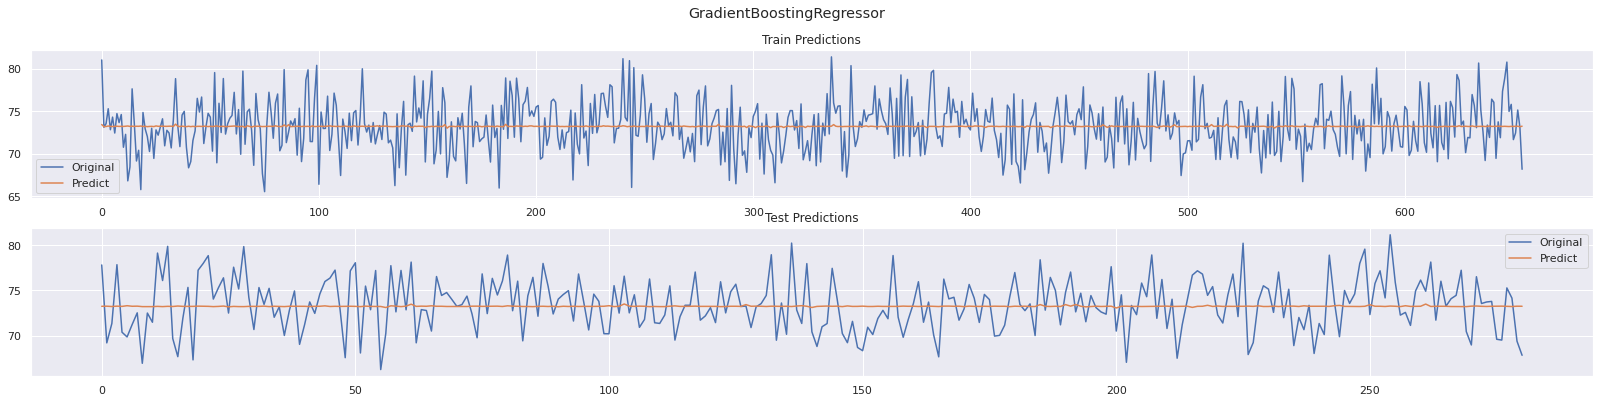

In [239]:
regressor = GradientBoostingRegressor()
parameters = { 'loss' : ['absolute_error','squared_error', 'huber', 'quantile'],
              'learning_rate' : (0.01,0.03,0.05),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators': [50, 100, 150],
              'max_depth': [1, 2, 3],
              'max_features': [1, 2, 5, 10]
             }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**KNeighborsRegressor** - метод, основанный на предположении о том, что близким объектам в признаковом пространстве соответствуют похожие метки. 

Best Hyperparameters:
{'n_neighbors': 100, 'p': 1, 'weights': 'uniform'}


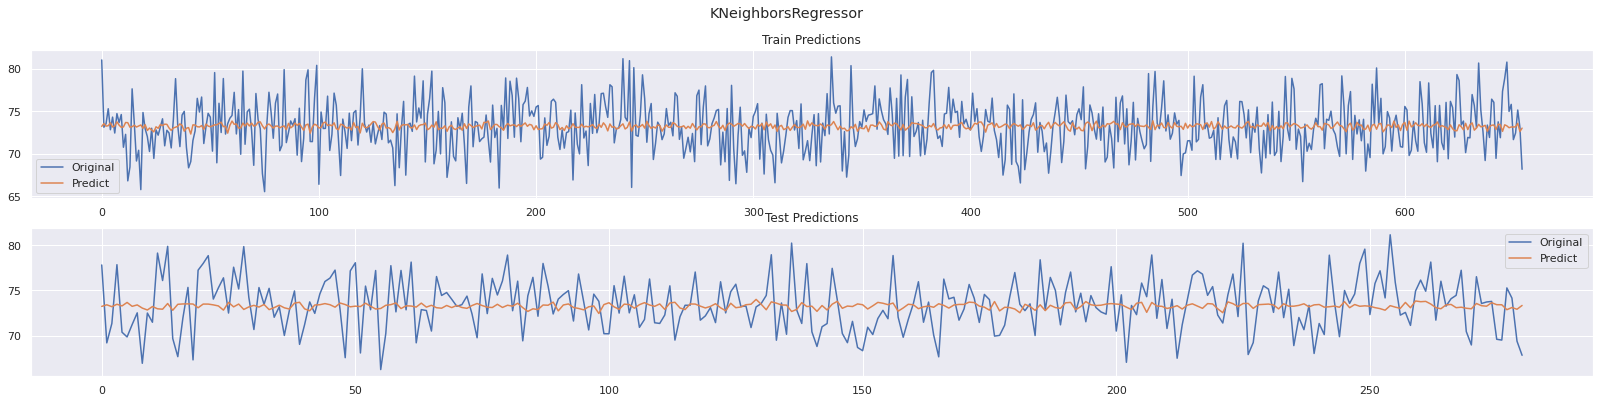

                  Name  Stage       R^2       MSE       MAE      MAPE
0  KNeighborsRegressor  Train  0.012642  9.296472  2.455945  0.033584
1  KNeighborsRegressor   Test -0.006676  8.772403  2.400875  0.032665


In [241]:
regressor = KNeighborsRegressor()
parameters = { 
            "n_neighbors"         : [20,30,50,100],
            "weights"             : ['uniform', 'distance'],
            "p"                   : [1,2]}

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

In [242]:
all_stats[all_stats['Stage'] == 'Train']

Name  Stage       R^2       MSE       MAE      MAPE
0             DummyRegressor  Train  0.000000  9.415500  2.469857  0.033766
2      RandomForestRegressor  Train  0.349268  6.126967  1.962504  0.026843
4  GradientBoostingRegressor  Train  0.007414  9.345696  2.461169  0.033648
6        KNeighborsRegressor  Train  0.012642  9.296472  2.455945  0.033584

In [243]:
all_stats[all_stats['Stage'] == 'Test']

Name Stage       R^2       MSE       MAE      MAPE
1             DummyRegressor  Test -0.005930  8.765902  2.398634  0.032616
3      RandomForestRegressor  Test -0.021166  8.898672  2.417373  0.032893
5  GradientBoostingRegressor  Test -0.003727  8.746707  2.397404  0.032602
7        KNeighborsRegressor  Test -0.006676  8.772403  2.400875  0.032665

Судя по полученным на тестовой выборке метрикам, лучше всего показал себя GradientBoostingRegressor, но его результат не является достаточным для применения на практике, и он близок к базовой модели, которая выдает среднее значение для всех элементов обучающей выборки.

**Решение для определения прочности при растяжении (МПа)**

In [244]:
target_name = 'Прочность при растяжении, МПа'

y = df_clean[target_name]
X = df_clean.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=False) # Убираем предсказываемые параметры

x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

**DummyRegressor**

Best Hyperparameters:
{}


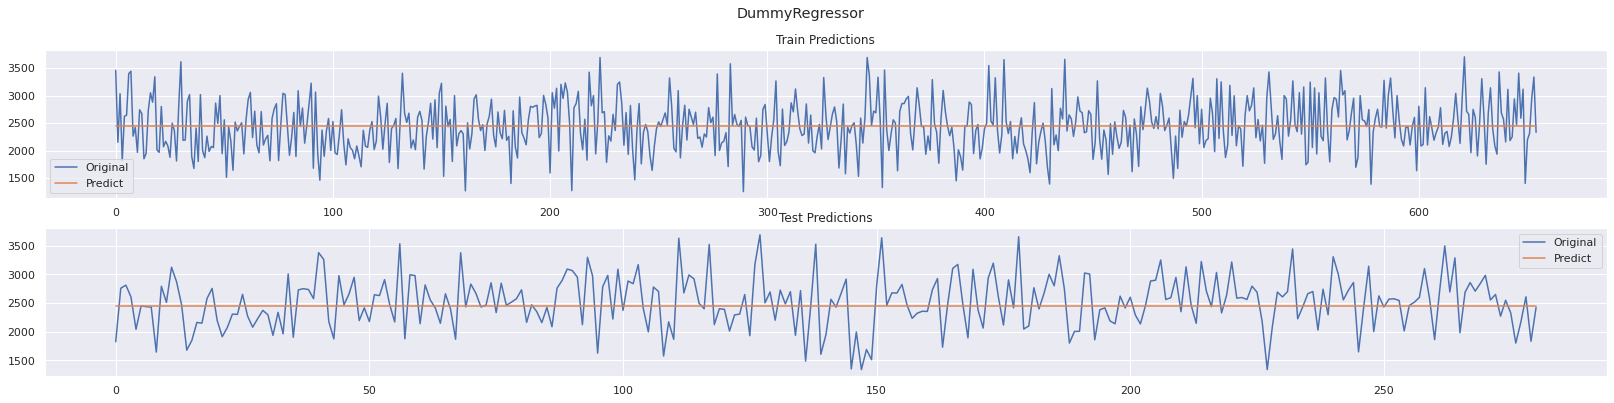

             Name  Stage       R^2            MSE         MAE      MAPE
0  DummyRegressor  Train  0.000000  217736.229939  372.430994  0.162392
1  DummyRegressor   Test -0.029672  210162.565630  360.306251  0.149034


In [245]:
regressor = DummyRegressor()
parameters = { }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = pd.DataFrame(columns=['Name', 'Stage', 'R^2', 'MSE','MAE', 'MAPE'])
all_stats = all_stats.append(stats, ignore_index=True)

**RandomForestRegressor**

Best Hyperparameters:
{'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}


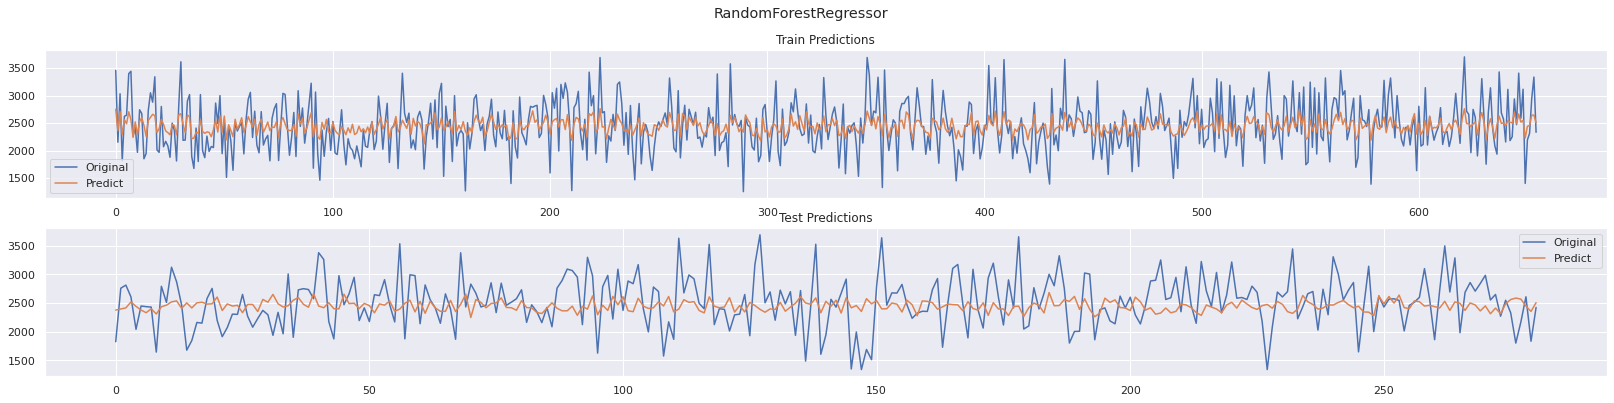

                    Name  Stage       R^2            MSE         MAE      MAPE
0  RandomForestRegressor  Train  0.363998  138480.693424  295.487787  0.128816
1  RandomForestRegressor   Test -0.063854  217139.445452  369.093638  0.152590


In [247]:
regressor = RandomForestRegressor()
parameters = { 
            "n_estimators"        : [10,50,100], # Число деревьев
            "max_features"        : ["sqrt", "log2"], # Кол-во параметров для расщепления
            "min_samples_split"   : [8,16], # Минимальное число объектов, при котором выполняется расщепление
            "min_samples_leaf"    : [2,5,8], # Ограничение на число объектов в листьях
            "max_depth"           : [100]} # Максимальная глубина деревьев

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**GradientBoostingRegressor**

Best Hyperparameters:
{'criterion': 'friedman_mse', 'learning_rate': 0.03, 'loss': 'absolute_error', 'max_features': 'sqrt'}


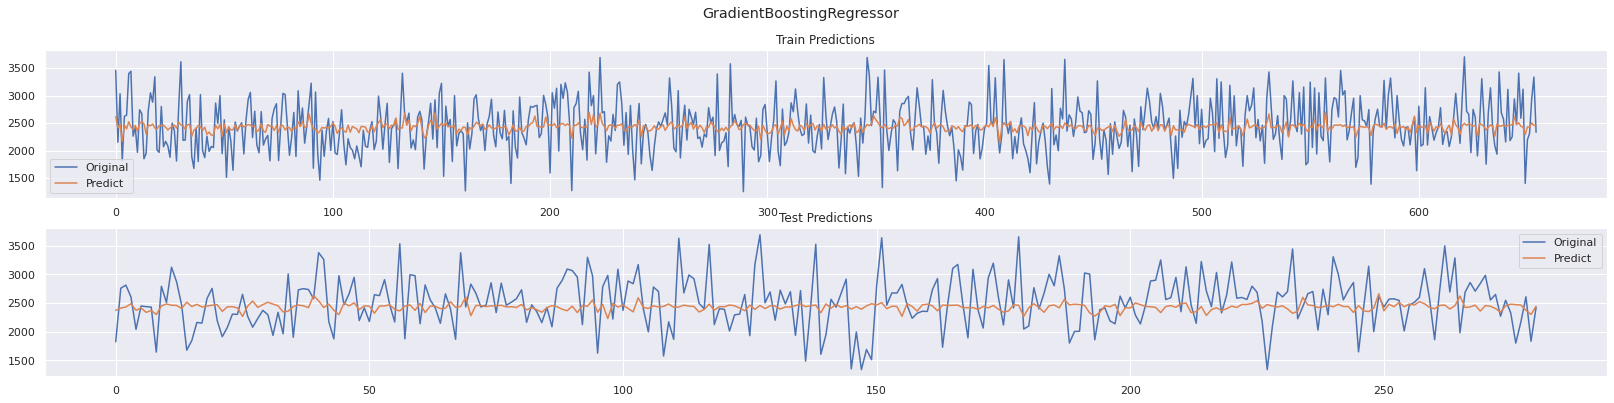

                        Name  Stage       R^2            MSE         MAE  \
0  GradientBoostingRegressor  Train  0.142152  186784.627464  334.840405   
1  GradientBoostingRegressor   Test -0.051314  214579.874666  365.897474   

       MAPE  
0  0.145193  
1  0.150194  


In [248]:
regressor = GradientBoostingRegressor()
parameters = {'loss' : ['absolute_error','squared_error', 'huber', 'quantile'],
              'learning_rate' : (0.03, 0.05, 0.1),
              'criterion' : ['friedman_mse', 'squared_error'],
              'max_features' : ['sqrt', 'log2']
             }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**KNeighborsRegressor**

Best Hyperparameters:
{'n_neighbors': 100, 'p': 1, 'weights': 'uniform'}


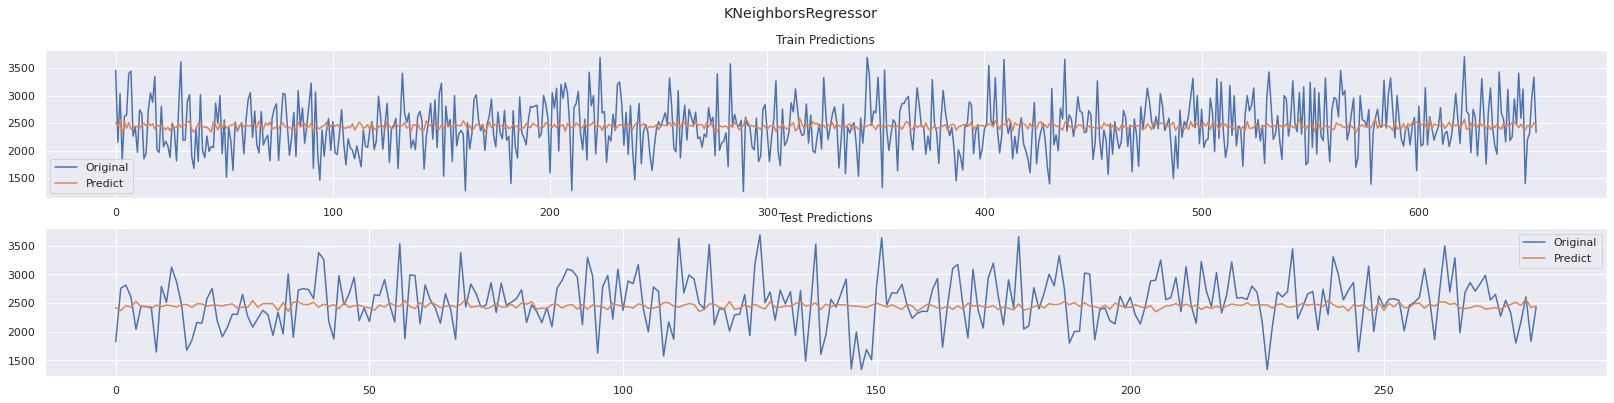

                  Name  Stage       R^2            MSE         MAE      MAPE
0  KNeighborsRegressor  Train  0.019189  213558.090541  369.183921  0.160938
1  KNeighborsRegressor   Test -0.042553  212791.724958  362.558180  0.150295


In [249]:
regressor = KNeighborsRegressor()
parameters = { 
            "n_neighbors"         : [20,30,50,100],
            "weights"             : ['uniform', 'distance'],
            "p"                   : [1,2]}

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

In [250]:
all_stats[all_stats['Stage'] == 'Train']

Name  Stage       R^2            MSE         MAE  \
0             DummyRegressor  Train  0.000000  217736.229939  372.430994   
2      RandomForestRegressor  Train  0.363998  138480.693424  295.487787   
4  GradientBoostingRegressor  Train  0.142152  186784.627464  334.840405   
6        KNeighborsRegressor  Train  0.019189  213558.090541  369.183921   

       MAPE  
0  0.162392  
2  0.128816  
4  0.145193  
6  0.160938

In [251]:
all_stats[all_stats['Stage'] == 'Test']

Name Stage       R^2            MSE         MAE  \
1             DummyRegressor  Test -0.029672  210162.565630  360.306251   
3      RandomForestRegressor  Test -0.063854  217139.445452  369.093638   
5  GradientBoostingRegressor  Test -0.051314  214579.874666  365.897474   
7        KNeighborsRegressor  Test -0.042553  212791.724958  362.558180   

       MAPE  
1  0.149034  
3  0.152590  
5  0.150194  
7  0.150295

В данном случае опять не удалось получить результаты лучше, чем на базовой модели. На обучающей выборке лучше всех обучился RandomForestRegressor, но на тестовой он показал худший результат. Полученные модели нельзя использовать на практике.

<H2>Задание 2

 Нейронная сеть, для рекомендации соотношения матрица-наполнитель

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import joblib
target_name = 'Соотношение матрица-наполнитель'

y = df_clean[target_name]
X = df_clean.drop([target_name], axis=1, inplace=False)

# Нормируем данные
x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

# Сохраняем трансформации
joblib.dump(x_scaler, "x_scaler.pkl")
 
# Разжеляем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

Будем использовать полносвязную нейронную сеть с dropout-слоями

In [255]:
import tensorflow

tensorflow.random.set_seed(42)


model = tensorflow.keras.Sequential([

  tensorflow.keras.layers.Dense(12, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(24, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(24, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(12, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
   tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(1, kernel_initializer=tensorflow.keras.initializers.RandomNormal())
])

model.compile(
    loss=['mse'],
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tensorflow.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(X_train, y_train, epochs=150, validation_split = 0.1)

Epoch 1/150
19/19 [==============================] - 1s 17ms/step - loss: 9.4442 - root_mean_squared_error: 3.0731 - val_loss: 8.9464 - val_root_mean_squared_error: 2.9910
Epoch 2/150
19/19 [==============================] - 0s 5ms/step - loss: 9.3485 - root_mean_squared_error: 3.0575 - val_loss: 8.8258 - val_root_mean_squared_error: 2.9708
Epoch 3/150
19/19 [==============================] - 0s 4ms/step - loss: 9.1799 - root_mean_squared_error: 3.0298 - val_loss: 8.5826 - val_root_mean_squared_error: 2.9296
Epoch 4/150
19/19 [==============================] - 0s 6ms/step - loss: 8.8033 - root_mean_squared_error: 2.9670 - val_loss: 8.0061 - val_root_mean_squared_error: 2.8295
Epoch 5/150
19/19 [==============================] - 0s 4ms/step - loss: 7.9143 - root_mean_squared_error: 2.8132 - val_loss: 6.6896 - val_root_mean_squared_error: 2.5864
Epoch 6/150
19/19 [==============================] - 0s 4ms/step - loss: 6.0332 - root_mean_squared_error: 2.4563 - val_loss: 4.2684 - val_root_

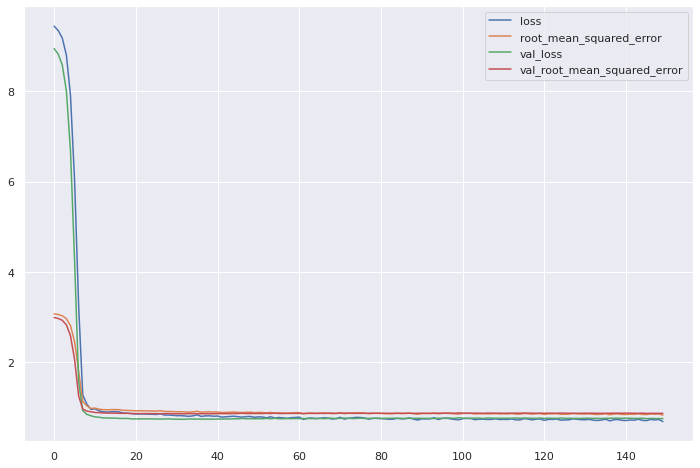

In [256]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.show()

21/21 [==============================] - 0s 2ms/step
   Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -5.911262  0.835002  0.697229  0.675086  0.233345


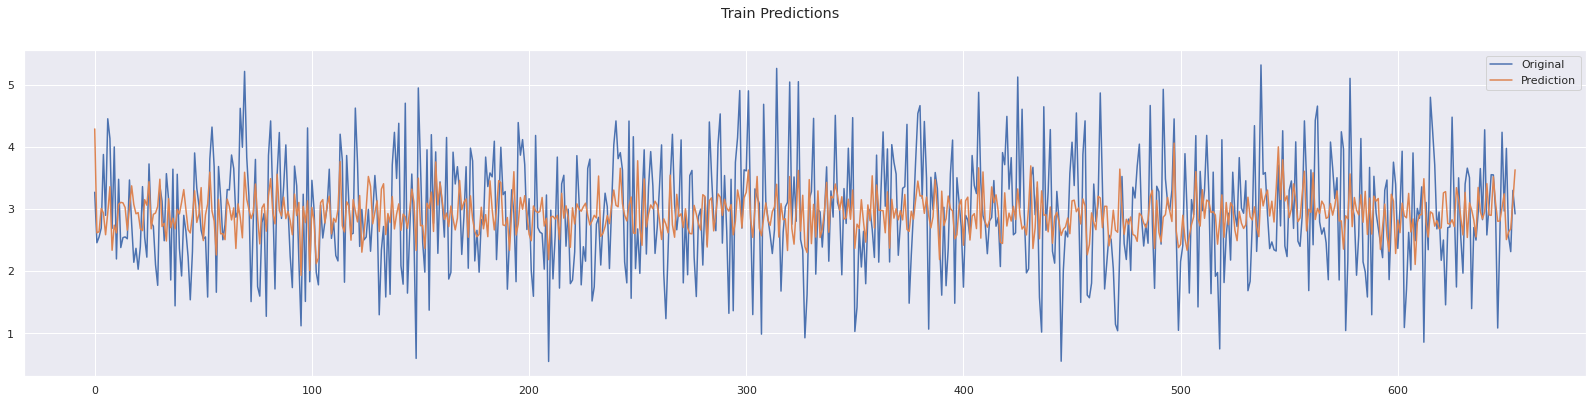

In [272]:
sns.set(rc={'figure.figsize':(28,6)})

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
import math

y_pred = model.predict(X_train)
plt.plot(list(range(y_train.shape[0])), y_train, label="Original")
plt.plot(y_pred, label="Prediction")
plt.legend()
plt.suptitle('Train Predictions')

r2 = r2_score(y_pred, y_train)
mse = mean_squared_error(y_pred, y_train)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_pred, y_train)
mape = mean_absolute_percentage_error(y_pred, y_train)

stats = pd.DataFrame(data={'Stage':'Train',
                           'R^2':r2, 
                           'RMSE':rmse, 
                           'MSE':mse,
                           'MAE':mae, 
                           'MAPE':mape}, index=[0])

print(stats)

9/9 [==============================] - 0s 2ms/step
   Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -5.911262  0.835002  0.697229  0.675086  0.233345
1   Test -7.390497  0.922522  0.851046  0.744449  0.257330
1   Test -7.390497  0.922522  0.851046  0.744449  0.257330


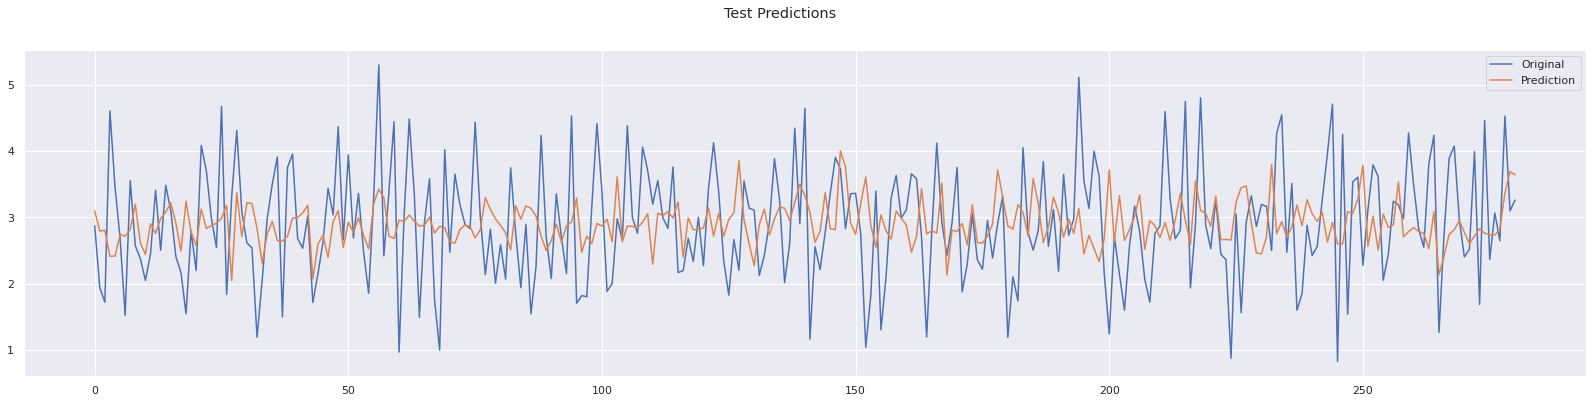

In [271]:
y_pred = model.predict(X_test)
plt.plot(list(range(y_test.shape[0])), y_test, label='Original')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.suptitle('Test Predictions')

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_pred, y_test)

stats = stats.append(pd.DataFrame(data={'Stage':'Test',
                      'R^2':r2, 
                      'RMSE':rmse, 
                      'MSE':mse,
                      'MAE':mae, 
                      'MAPE':mape}, index=[1]))

print(stats)

Визуально можно заметить, что нейронная сеть гораздо лучше выявила закономерности в данных, чем модели из п.4

[Text(0.5, 1.0, 'Гистограмма ошибок')]

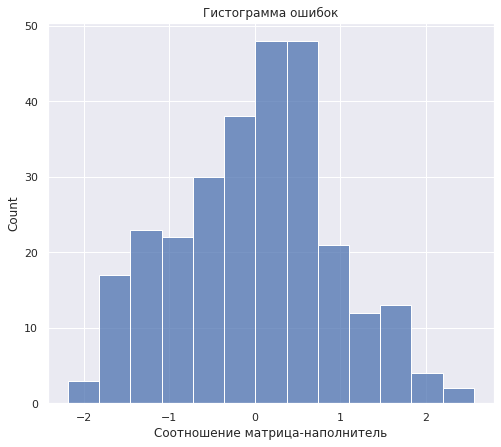

In [259]:
sns.set(rc={'figure.figsize':(8,7)})
sns.histplot(y_pred.ravel() - y_test).set(title='Гистограмма ошибок')

Метрики качества для обучающей и тестовой выборки

In [270]:
stats

Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -5.911262  0.835002  0.697229  0.675086  0.233345
1   Test -7.390497  0.922522  0.851046  0.744449  0.257330

<h2>Сохранение модели

In [211]:
model.save('models')
!zip -r /content/file.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/assets/ (stored 0%)
  adding: content/models/keras_metadata.pb (deflated 91%)
  adding: content/models/saved_model.pb (deflated 90%)
  adding: content/models/variables/ (stored 0%)
  adding: content/models/variables/variables.index (deflated 59%)
  adding: content/models/variables/variables.data-00000-of-00001 (deflated 50%)


<h2>Использование модели

Реализуем консольное приложение, использующее полученную нейронную сеть для предсказания оптимального соотношения матрица-наполнитель

In [207]:
import tensorflow as tf
import joblib
import numpy as np

# Загружаем модель
model = tf.keras.models.load_model('/content/models')
# Загружаем трансформацию
x_scaler = joblib.load("/content/x_scaler.pkl") 

In [209]:
param_names = ['Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
               'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 
               'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
param_list = []

print("Введите параметры:")

## ---- Однострочный ввод --------
# param_strs = input().split('\t')
# param_list = [float(param) for param in param_strs]

# ---- Последовательный ввод --------
for param_name in param_names:
  while True:
    try:
        param = input('- ' + param_name + ': ')
        param_list += [float(param)]
    except ValueError:
        print("Ошибка ввода, попробуйте еще раз.")
        continue
    else:
      break

input_data = pd.DataFrame([param_list], columns=param_names)
X = x_scaler.transform(input_data)
y = model.predict(X)
print("Рекомендуемое соотношение матрица-наполнитель: ", y[0][0])

Введите параметры:
- Плотность, кг/м3: 1880.0
- Модуль упругости, ГПа: 622.0
- Количество отвердителя, м.%: 111.86
- Содержание эпоксидных групп,%_2: 22.2678571428571
- Температура вспышки, С_2: 284.615384615384
- Поверхностная плотность, г/м2: 470.0
- Модуль упругости при растяжении, ГПа: 73.3333333333333
- Прочность при растяжении, МПа: 2455.55555555555
- Потребление смолы, г/м2: 220.0
- Угол нашивки, град: 90
- Шаг нашивки: 4
- Плотность нашивки: 60
1/1 [==============================] - 0s 22ms/step
Рекомендуемое соотношение матрица-наполнитель:  2.5087674
